In [4]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
df=pd.read_csv("data_news.csv")

df.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [8]:
# Display dataset information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB
None


In [10]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64


In [10]:
missing_percentage = (df['keywords'].isnull().sum() / len(df)) * 100
print(f"Missing values in 'keywords': {missing_percentage:.2f}%")


Missing values in 'keywords': 5.34%


In [12]:
df['keywords'].fillna("unknown", inplace=True)


C:\Users\mkadi\AppData\Local\Temp\ipykernel_6004\656893133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['keywords'].fillna("unknown", inplace=True)


In [16]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mkadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mkadi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mkadi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())  # Remove special characters & lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization
    return ' '.join(tokens)

# Combine 'headline' and 'short_description' for meaningful text representation
df['processed_text'] = df['headline'].astype(str) + " " + df['short_description'].astype(str)
df['processed_text'] = df['processed_text'].apply(preprocess_text)

In [24]:
df['category_encoded'] = df['category'].astype('category').cat.codes

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['processed_text'])
y = df['category_encoded']


In [48]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

In [34]:
# Bag-of-Words (Count Vectorization)
bow_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
bow_matrix = bow_vectorizer.fit_transform(df['processed_text'])

In [50]:
# Display shape of the feature matrices
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Bag-of-Words Matrix Shape:", bow_matrix.shape)

TF-IDF Matrix Shape: (50000, 5000)
Bag-of-Words Matrix Shape: (50000, 5000)


C:\Users\mkadi\AppData\Local\Temp\ipykernel_18252\1236155312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in word_freq], y=[word[0] for word in word_freq], palette='viridis')


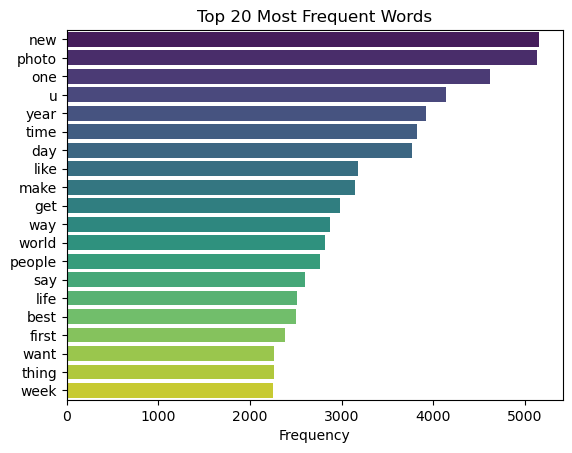

In [28]:
from collections import Counter

all_words = ' '.join(df['processed_text']).split()
word_freq = Counter(all_words).most_common(20)

sns.barplot(x=[word[1] for word in word_freq], y=[word[0] for word in word_freq], palette='viridis')
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.show()


C:\Users\mkadi\AppData\Local\Temp\ipykernel_6004\3739908856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index[:20], y=category_counts.values[:20], palette="viridis")


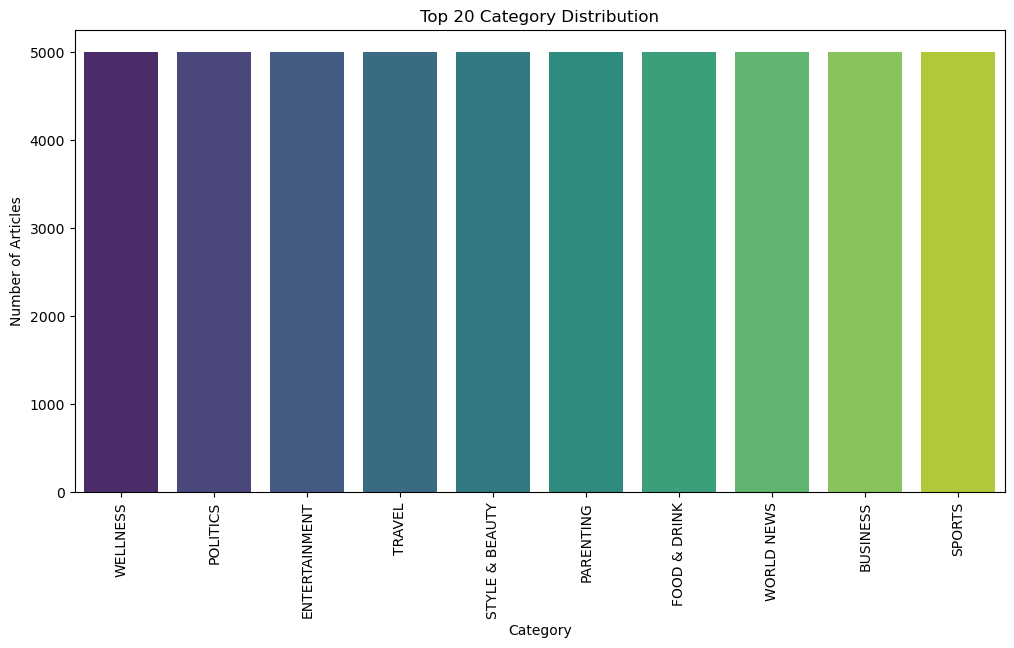

In [52]:
# Exploratory Data Analysis (EDA) - Category Distribution
category_counts = df['category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index[:20], y=category_counts.values[:20], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.title("Top 20 Category Distribution")
plt.show()

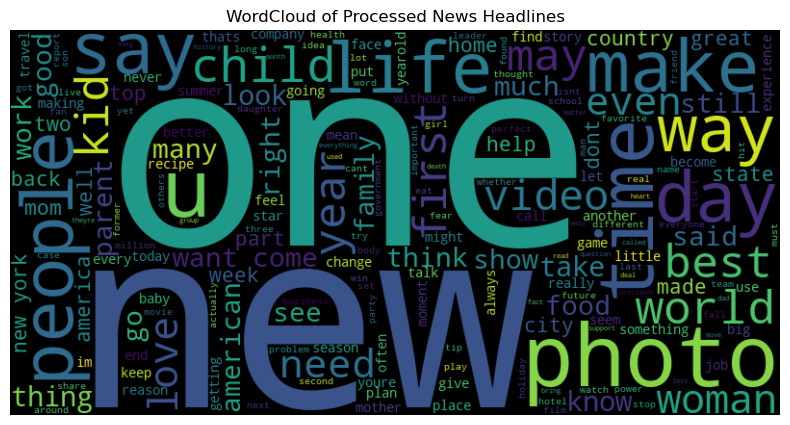

In [30]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['processed_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Processed News Headlines")
plt.show()


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [34]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=200, n_jobs=-1),
    "SVM": SVC(kernel='linear')
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.7823
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       955
           1       0.80      0.74      0.77       985
           2       0.82      0.85      0.84      1021
           3       0.69      0.74      0.72      1030
           4       0.80      0.73      0.76      1034
           5       0.87      0.86      0.86       995
           6       0.85      0.84      0.84       986
           7       0.79      0.80      0.80      1008
           8       0.71      0.72      0.72      1009
           9       0.79      0.81      0.80       977

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Logistic Regression Accuracy: 0.8004
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       955
           1       0.77      0.78      0.78       985
           2

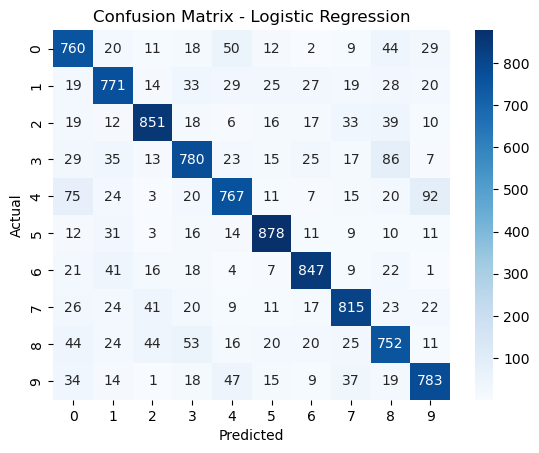

In [38]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion Matrix for the best model (Logistic Regression)
best_model = models["Logistic Regression"]
y_pred_best = best_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_best, "Logistic Regression")

C:\Users\mkadi\AppData\Local\Temp\ipykernel_18252\3151726583.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette="coolwarm")


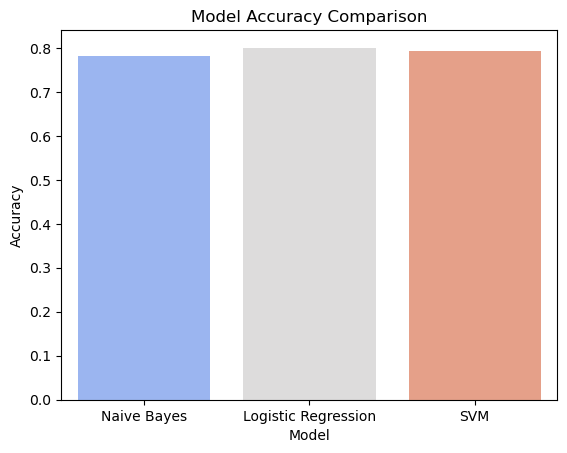

In [40]:
results = pd.DataFrame([
    {"Model": "Naive Bayes", "Accuracy": accuracy_score(y_test, models["Naive Bayes"].predict(X_test))},
    {"Model": "Logistic Regression", "Accuracy": accuracy_score(y_test, models["Logistic Regression"].predict(X_test))},
    {"Model": "SVM", "Accuracy": accuracy_score(y_test, models["SVM"].predict(X_test))}
])

sns.barplot(x="Model", y="Accuracy", data=results, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
